### Урок 5. Домашняя работа

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как в уроке
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [1]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

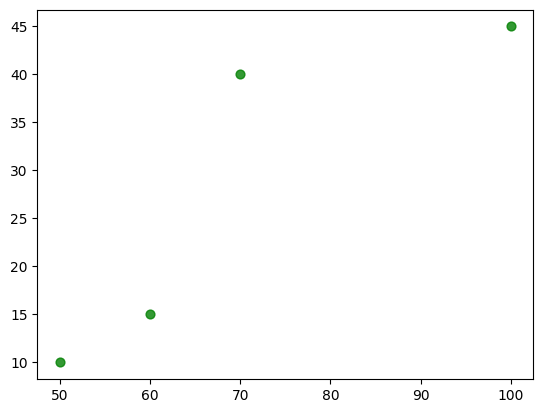

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline
plt.scatter(x_hw, y_hw, 40, 'g', 'o', alpha=0.8)
plt.show()

In [3]:
import numpy as np

X = np.array([[1, 50],[1, 60],[1, 70],[1, 100]])

X

array([[  1,  50],
       [  1,  60],
       [  1,  70],
       [  1, 100]])

In [4]:
Y = np.array([[10],[15],[40],[45]])
Y

array([[10],
       [15],
       [40],
       [45]])

In [5]:
X_T_X = (X.T).dot(X)

X_T_X

array([[    4,   280],
       [  280, 21000]])

In [6]:
from numpy.linalg import inv

X_T_X_inverted = inv(X_T_X)

X_T_X_inverted

array([[ 3.75000000e+00, -5.00000000e-02],
       [-5.00000000e-02,  7.14285714e-04]])

In [7]:
w = X_T_X_inverted.dot(X.T).dot(Y)

print("w_1=%.5f, w_2=%.3f" % (w[0][0],w[1][0]))

w_1=-22.50000, w_2=0.714


In [8]:
w = X_T_X_inverted.dot(X.T).dot(Y)

In [9]:
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

# задаём границы координатных осей
margin = 10
X_min = 20
X_max = X[:,1].max()+margin

# набор точек, чтобы нарисовать прямую
X_support = np.linspace(X_min, X_max, num=100)
# предсказания нашей модели
Y_model = w[0][0] + w[1][0]*X_support

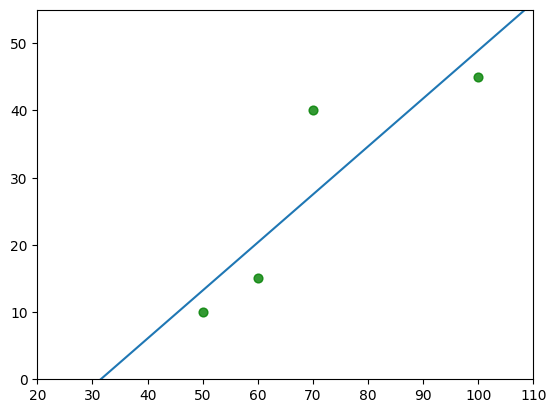

In [10]:
# настройка графика 
plt.xlim(X_min, X_max)
plt.ylim(0, Y[:,0].max() + margin)
# рисуем исходные точки
plt.scatter(X[:,1], Y[:,0], 40, 'g', 'o', alpha=0.8)
# предсказания модели
plt.plot(X_support, Y_model)

plt.show()

### Домашняя работа 3.7

У вас есть два набора точек – истинные значения *y_true* и предсказанные значения *y_pred*

* для каждой точки из *y_true* постройте величину ошибки $e = y-\hat{y}$ – это называется **остатки регрессии**
* возведите ошибки в квадрат $e^2$
* постройте график ошибок – зависимость $e^2$ от $e$

In [11]:
import numpy as np

y_pred_ = np.array([30.0, 25.03, 30.57, 28.61, 27.94, 25.26, 23.0, 19.54, 11.52, 18.92, 19.0, 21.59, 20.91, 19.55, 19.28, 19.3, 20.53, 16.91, 16.18, 18.41, 12.52, 17.67, 15.83, 13.81, 15.68, 13.39, 15.46, 14.71, 19.55, 20.88, 11.46, 18.06, 8.81, 14.28, 13.71, 23.81, 22.34, 23.11, 22.92, 31.36])
y_true_ = np.array([24.0, 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15.0, 18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6, 15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21.0, 12.7, 14.5, 13.2, 13.1, 13.5, 18.9, 20.0, 21.0, 24.7, 30.8])

In [12]:
dots = y_true_-y_pred_
dots2 = dots**2

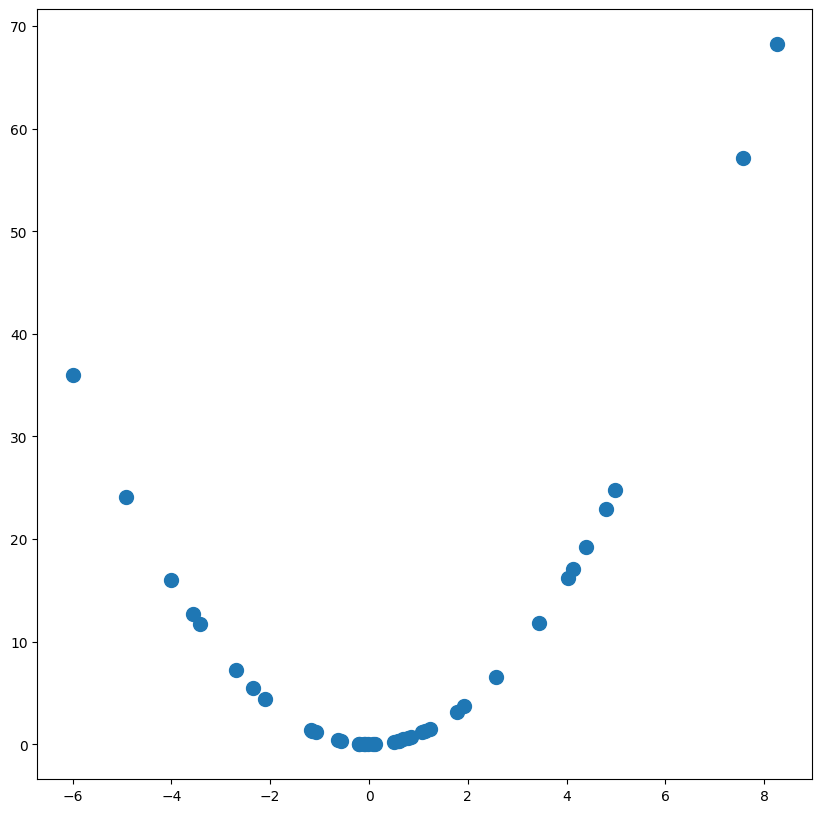

In [13]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(dots, dots2, s=100)

# отображаем картинку
plt.show()

# Лабораторная 3.9
Даны точки $x$ и значения в этих точках $y$. Нормализуйте $y$ с помощью *z-score* и постройте график зависимости нормализованных значений от $x$. Для графика используйте `.scatter(x,y_tansformed)`

In [14]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

x = np.linspace(1,10,num=10)
y = np.array(
    [1.,  3.,  4.,  2., 10.,  5.,  5.,  2.,  5., 10.],
    dtype=np.float32
)

print("Сырой датасет: %s" % y)

y_tansformed = StandardScaler().fit_transform(y.reshape(-1, 1)).reshape(-1)
print("z-transform датасет: %s" %y_tansformed)

Сырой датасет: [ 1.  3.  4.  2. 10.  5.  5.  2.  5. 10.]
z-transform датасет: [-1.2465616  -0.57274455 -0.23583598 -0.9096531   1.7856154   0.10107257
  0.10107257 -0.9096531   0.10107257  1.7856154 ]


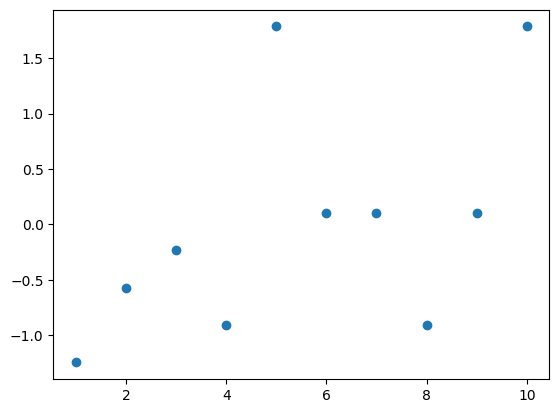

In [15]:

ax = plt.axes()
ax.scatter(x,y_tansformed)

# 3.11
### Домашняя работа

**Задание простого уровня** Мы говорили, что метрики качества нужны, чтобы сравнивать различные модели между собой. В задаче полиномиальной регрессии реализуйте код для выбора лучшей степени полиному:

* возьмите все степени от 1 до 10 по порядку, без пропусков.
* найдите степень полинома, где будет лучший r2-score
* напишите код, который выводит самую подходящую степень полинома и соответствующий ей скор

Эта процедура называется Grid Search и помогает найти лучшие параметры для модели.

Обучите лучшую модель и сделайте predict

In [16]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from numpy.linalg import inv

%matplotlib inline

In [18]:
data = pd.read_csv('C:\\Users\\gorin\\Downloads\\3.10_non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [19]:
def generate_degrees(source_data: list, degree: int):
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [20]:
from sklearn.metrics import r2_score
def train_polynomial(degree, data):
    r2 = 0
    best_d = 0
    for d in degree:
        X = generate_degrees(data['x_train'], d)
        model = LinearRegression().fit(X, data['y_train'])
        y_pred = model.predict(X)
        if (r2<r2_score(data['y_train'], y_pred)):
            r2 = r2_score(data['y_train'], y_pred)
            best_d = d
            print("Степень полинома %d R2 score %.3f" % (best_d, r2))
        
    

    plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')
    plt.plot(data['x_train'], y_pred)

Степень полинома 1 R2 score 0.519
Степень полинома 2 R2 score 0.533
Степень полинома 3 R2 score 0.888
Степень полинома 4 R2 score 0.895
Степень полинома 5 R2 score 0.896
Степень полинома 6 R2 score 0.899
Степень полинома 7 R2 score 0.900
Степень полинома 8 R2 score 0.909
Степень полинома 9 R2 score 0.909
Степень полинома 10 R2 score 0.909


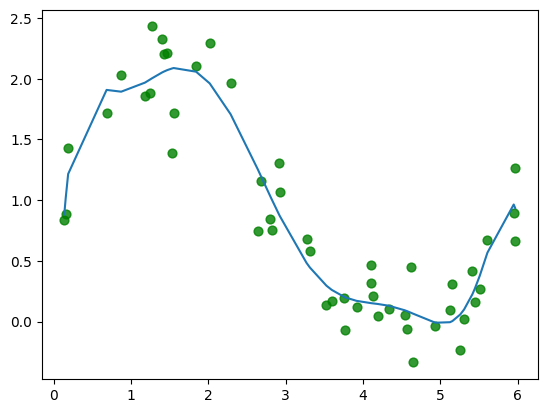

In [21]:
degree = [1,2,3,4,5,6,7,8,9,10]

train_polynomial(degree, data)

**Задание среднего уровня** Напишите класс для обучения модели, который содержит:

* функцию `.fit(X, y)` , которая принимает на вход массив фичей `X`, массив таргетов `y` и обучает коэффициенты регрессии. Код для обучения взять из первого урока модуля *Постановка ML задачи линейной регрессии*
* функцию `.predict(X)`, которая по массиву фичей `X` возвращает массив предсказаний `y`

Нужно использовать код для аналитически вычисляемых коэффициентов.

Это задание позволит понять, как работает линейная регрессия "внутри" библиотечной реализации.

In [22]:
class CustomLinearReg:
    import numpy as np
    def __init__(self):
        pass
    def fit(self, X, y):
        x = X.array
        _x = []
        for i in x:
            _x.append([1,i])
        x = np.asarray(_x)
        X_T_X = (x.T).dot(x)
        X_T_X_inverted = inv(X_T_X)
        self.w = X_T_X_inverted.dot(x.T).dot(y)

    def predict(self, X):
        y = self.w[0] + self.w[1]*X
        return y

In [25]:
data = pd.read_csv("C:\\Users\\gorin\\Downloads\\1.8_phones.csv",sep=',') 
rg = CustomLinearReg()
rg.fit(data.year, data.price)
res = rg.predict(data.year)
res


0      9838.834757
1      8868.438826
2      4016.459171
3     10809.230689
4      6927.646964
          ...     
95     4986.855102
96     9838.834757
97     7898.042895
98     9838.834757
99     7898.042895
Name: year, Length: 100, dtype: float64

In [26]:
data.price

0      7256
1      7623
2      1916
3     15045
4      4478
      ...  
95     8398
96     7197
97     5694
98     7589
99     9533
Name: price, Length: 100, dtype: int64

**Задание высокого уровня**

1. разделите датасет с домами Бостона из Урока 2 (таргет и фичи) на две части: в одной части 80% датасета (назовём train) в другой 20% (назовём valid) с помощью функции `train_test_split` из библиотеки `sklearn`
1. обучите модель только на train датасете
1. постройте предсказания valid датасете
1. Посчитайте  `r2 score` на валидационном сете

После этого примените к обеим датасетам z-преобразование и повторите шаги 2-4. Как изменилась метрика r2?

Это задание поможет понять, как валидировать линейную регрессию (и другие модели) на отложенной выборке.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

data= pd.read_csv("C:\\Users\\gorin\\Downloads\\1.4_houses.csv")
X = data[["dim_1"]]
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

reg = LinearRegression().fit(X_train, y_train)
reg.predict(X_test[0:1])[0], y_test[0:1]


(1072.0561321061507,
 80    823.0
 Name: price, dtype: float64)

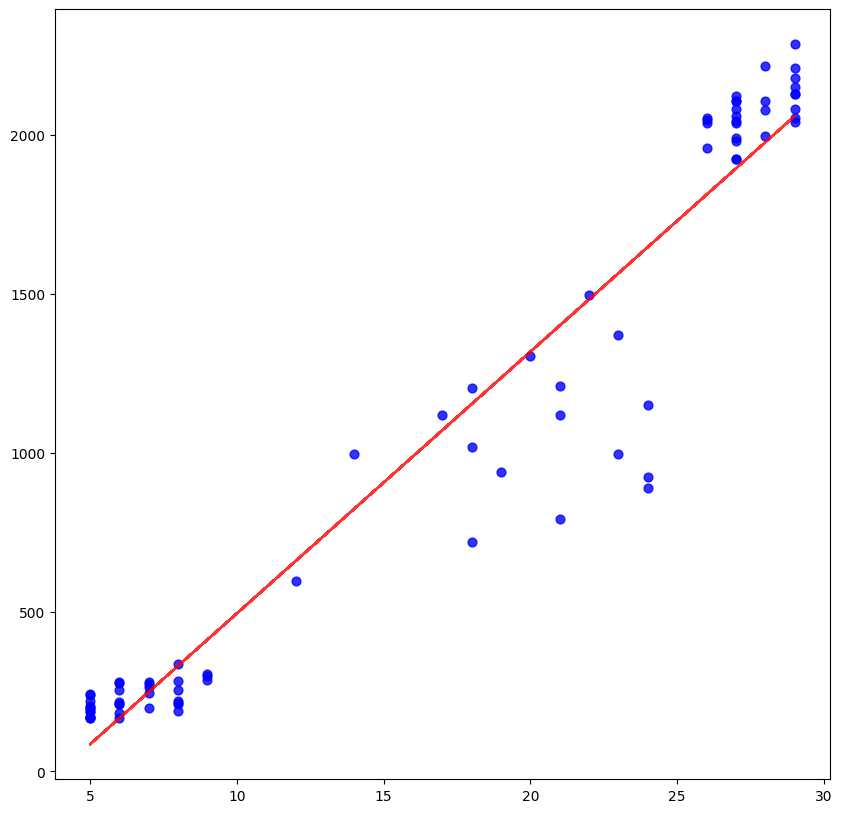

In [29]:
## TRAIN

fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

y_hat_t = reg.predict(X_train)
ax.scatter(X_train, y_train, 40, 'b', 'o', alpha=0.8)

ax.plot(X_train, y_hat_t, 'r', alpha=0.8, label='fitted')

plt.show()

In [30]:
y_pred = reg.predict(X_test)
print("r2_score = %s" % r2_score(y_test, y_pred))

r2_score = 0.9408459891806064


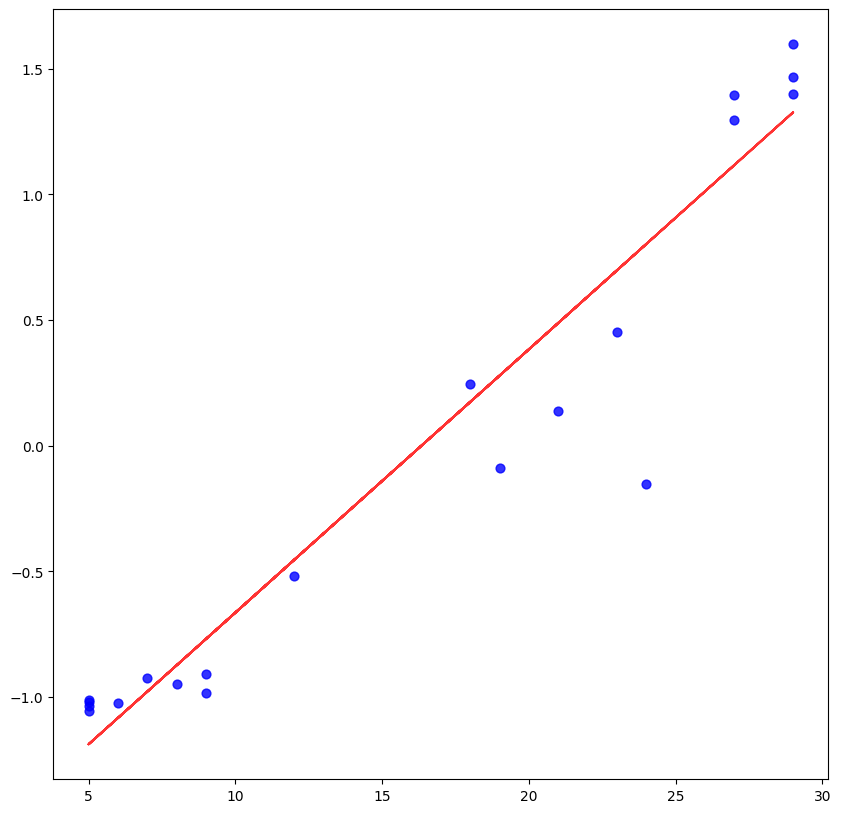

In [32]:
# Применяем z-score

from sklearn.preprocessing import StandardScaler

data= pd.read_csv("C:\\Users\\gorin\\Downloads\\1.4_houses.csv")
X = data[["dim_1"]]
y = data["price"]

y_transformed = StandardScaler().fit_transform(y.values.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2)
reg = LinearRegression().fit(X_train, y_train)
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

y_hat_t = reg.predict(X_test)
ax.scatter(X_test, y_test, 40, 'b', 'o', alpha=0.8)

ax.plot(X_test, y_hat_t, 'r', alpha=0.8, label='fitted')

plt.show()

In [33]:
y_pred = reg.predict(X_test)
print("r2_score = %s" % r2_score(y_test, y_pred))

r2_score = 0.9170097276059382
